In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import plot
from utils.useCMSstyle import *

In [3]:
import awkward as ak
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [19]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])

In [69]:
from utils.cutConfig import jet_btagWP
# tight_b = 0.7264
tight_b = jet_btagWP[1]
# medium_b = 0.2770
medium_b = jet_btagWP[2]
# loose_b = 0.0494
loose_b = jet_btagWP[3]

In [22]:
pt_bins = np.linspace(0,300,50)
score_bins = np.linspace(0,1,100)
mH_bins = np.linspace(0,300,50)
x = x_bins(score_bins)

In [30]:
bkg_6j_n = np.zeros_like(score_bins[:-1])
for bkg_6j, scale in zip(bkgd_tree.b_6j_score, bkgd_tree.scale):
    n, e = np.histogram(bkg_6j.to_numpy(), bins=score_bins)
    bkg_6j_n += n*scale

eff_6j_bkg = np.array(())
for cut in score_bins[:-1]:
    eff_6j_bkg = np.append(eff_6j_bkg, bkg_6j_n[score_bins[:-1] >= cut].sum()/bkg_6j_n.sum())

In [44]:
bkg_3d_n = np.zeros_like(score_bins[:-1])
for bkg_3d, scale in zip(bkgd_tree.b_3d_score, bkgd_tree.scale):
    n, e = np.histogram(bkg_3d.to_numpy(), bins=score_bins)
    bkg_3d_n += n*scale

eff_3d_bkg = np.array(())
for cut in score_bins[:-1]:
    eff_3d_bkg = np.append(eff_3d_bkg, bkg_3d_n[score_bins[:-1] >= cut].sum()/bkg_3d_n.sum())

In [41]:
n_6j_sig, e = np.histogram(signal_tree.b_6j_score.to_numpy(), bins=score_bins)
eff_6j_sig = np.array(())
for cut in score_bins[:-1]:
    eff_6j_sig = np.append(eff_6j_sig, n_6j_sig[score_bins[:-1] >= cut].sum()/n_6j_sig.sum())

In [ ]:
n_3d_sig, e = np.histogram(signal_tree.b_3d_score.to_numpy(), bins=score_bins)
eff_3d_sig = np.array(())
for cut in score_bins[:-1]:
    eff_3d_sig = np.append(eff_3d_sig, n_3d_sig[score_bins[:-1] >= cut].sum()/n_3d_sig.sum())

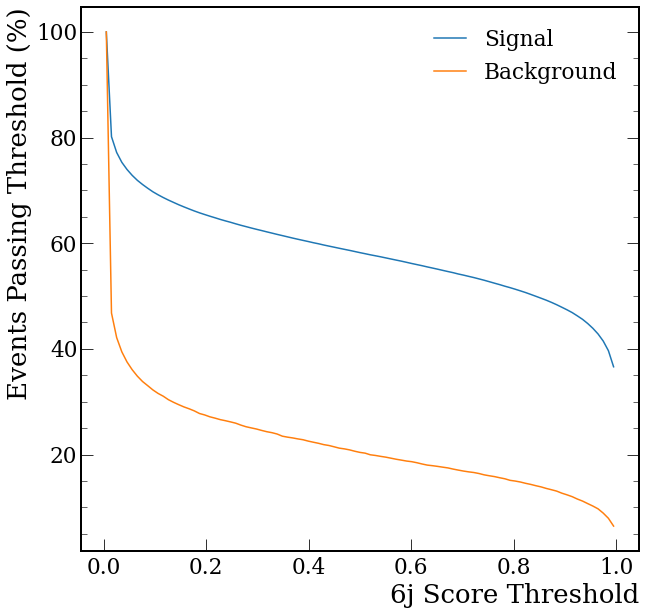

In [43]:
fig, ax = plt.subplots()

ax.plot(x, eff_6j_sig*100, label='Signal')
ax.plot(x, eff_6j_bkg*100, label='Background')
ax.set_xlabel('6j Score Threshold')
ax.set_ylabel('Events Passing Threshold (%)')
ax.legend()

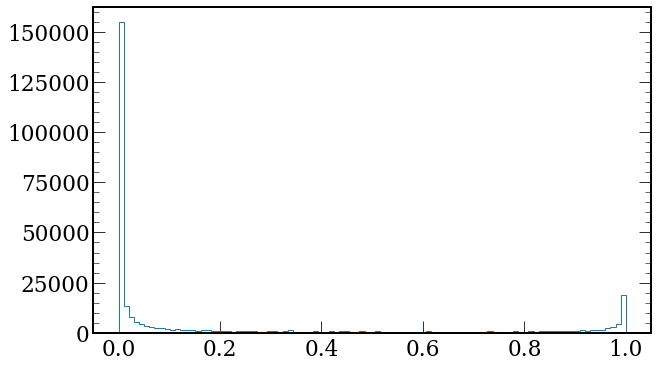

In [29]:
_ = plot(x=x, weights=bkg_6j_n, bins=score_bins)